# Analysis of Smart Device Usage for Bellabeat Marketing Strategy

## Introduction

This project aims to analyze public data about smart device users' daily habits and utilize the insights derived to enhance the marketing strategies for Bellabeat.

## Problem Statement

Identify key trends and patterns in smart device usage that can inform and optimize Bellabeat's marketing and product strategies.

## Guiding Questions

1. What are the specific trends and patterns in smart device usage, particularly concerning activity, sleep, ?
2. How can the insights obtained be applied to Bellabeat's customer base to inform marketing strategies?

## Key Stakeholders

1. Urska Srsen: Bellabeat's co-founder and Chief Creative Officer.
2. Sando Mur: Mathematician and Bellabeat's co-founder; key member of the Bellabeat executive team.
3. Bellabeat marketing analytics team: The team would use these insights to drive marketing campaigns.

## DataSet

#### The primary data source used for this analysis is the "Daily Activity and Sleep Day" dataset provided from Fitbit Fitness Tracker Data. This dataset contains personal fitness tracker data from thirty Fitbit users, specifically focusing on their daily activities.

### Additional Information About DataSet

- The dataset, named "dailyActivity_merged.csv" and "Sleepday_merged.csv" was downloaded from Kaggle
    - The Dataset contains daily data on TotalSteps, TotalDistance, Calories, Sedentary so it could be useful for finding patterns
- The data is organized in a wide format.
- The data appears to be reliable, original, comprehensive, current, and cited (ROCCC). However, since it's a public dataset and doesn't contain a full demographic breakdown, there could be potential biases or limitations. For instance, we do not know the users' age, gender, location, or other potentially relevant information.
- The data's integrity will be checked during the cleaning and preprocessing stages, where we will look for missing values, inconsistencies, and outliers.
- This dataset provides detailed information on Fitbit users' daily activity, which is integral to understanding user behavior and trends.

#### Importing Libraries

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Loading DataSet

In [2]:
df = pd.read_csv(r"C:\Users\ridha\OneDrive\Desktop\DA using Python\Bellabeat\Fitabase Data 4.12.16-5.12.16\dailyActivity_merged.csv")
df_sleep = pd.read_csv(r"C:\Users\ridha\OneDrive\Desktop\DA using Python\Bellabeat\Fitabase Data 4.12.16-5.12.16\sleepDay_merged.csv")

In [3]:
# ActivityDate is object, so let's convert it into 

df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])
df_sleep['SleepDay'] = pd.to_datetime(df_sleep['SleepDay'])

In [4]:
#Let's merge this data set

df_merge = pd.merge(df,df_sleep,left_on=['Id', 'ActivityDate'], right_on=['Id', 'SleepDay'])

In [5]:
df_merge.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,2016-04-12,1,327,346
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2016-04-13,2,384,407
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,2016-04-15,1,412,442
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2016-04-16,2,340,367
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,2016-04-17,1,700,712


In [6]:
# Looking for null values

df_merge.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
SleepDay                    0
TotalSleepRecords           0
TotalMinutesAsleep          0
TotalTimeInBed              0
dtype: int64

In [7]:
# Let's check datatypes
df_merge.dtypes

Id                                   int64
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
SleepDay                    datetime64[ns]
TotalSleepRecords                    int64
TotalMinutesAsleep                   int64
TotalTimeInBed                       int64
dtype: object

In [8]:
# let's see if there's any outliers in the dataset
df_merge.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,5.000979e+09,8541.140436,6.038620,6.033632,0.113142,1.450363,0.750242,3.807119,0.000920,25.188862,18.038741,216.854722,712.169492,2397.573850,1.118644,419.467312,458.639225
std,2.060360e+09,4156.926990,3.051998,3.047420,0.513107,1.994352,1.000183,1.734511,0.008653,36.388187,22.403590,87.164687,165.957432,762.886326,0.345521,118.344679,127.101607
min,1.503960e+09,17.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,2.000000,0.000000,257.000000,1.000000,58.000000,61.000000
25%,3.977334e+09,5206.000000,3.600000,3.600000,0.000000,0.000000,0.000000,2.540000,0.000000,0.000000,0.000000,158.000000,631.000000,1850.000000,1.000000,361.000000,403.000000
50%,4.702922e+09,8925.000000,6.290000,6.290000,0.000000,0.570000,0.420000,3.680000,0.000000,9.000000,11.000000,208.000000,717.000000,2220.000000,1.000000,433.000000,463.000000
75%,6.962181e+09,11393.000000,8.030000,8.020000,0.000000,2.370000,1.040000,4.930000,0.000000,38.000000,27.000000,263.000000,783.000000,2926.000000,1.000000,490.000000,526.000000
max,8.792010e+09,22770.000000,17.540001,17.540001,4.081692,12.540000,6.480000,9.480000,0.110000,210.000000,143.000000,518.000000,1265.000000,4900.000000,3.000000,796.000000,961.000000


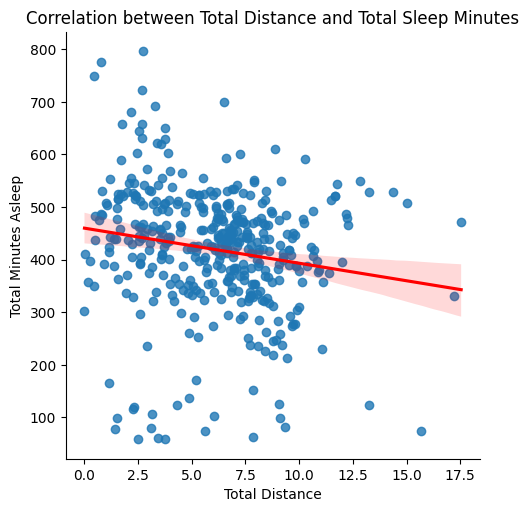

In [9]:
# Let's see the corelation between Total Distance and Total minutes as Sleep

g = sns.lmplot(x='TotalDistance', y='TotalMinutesAsleep', data=df_merge, line_kws={'color': 'red'})
g = (g.set_axis_labels("Total Distance", "Total Minutes Asleep").set(title="Correlation between Total Distance and Total Sleep Minutes"))
plt.show()


#### Finding 1. Looks like there's a correlation between Longer the duration of sleep, shorter walking distance

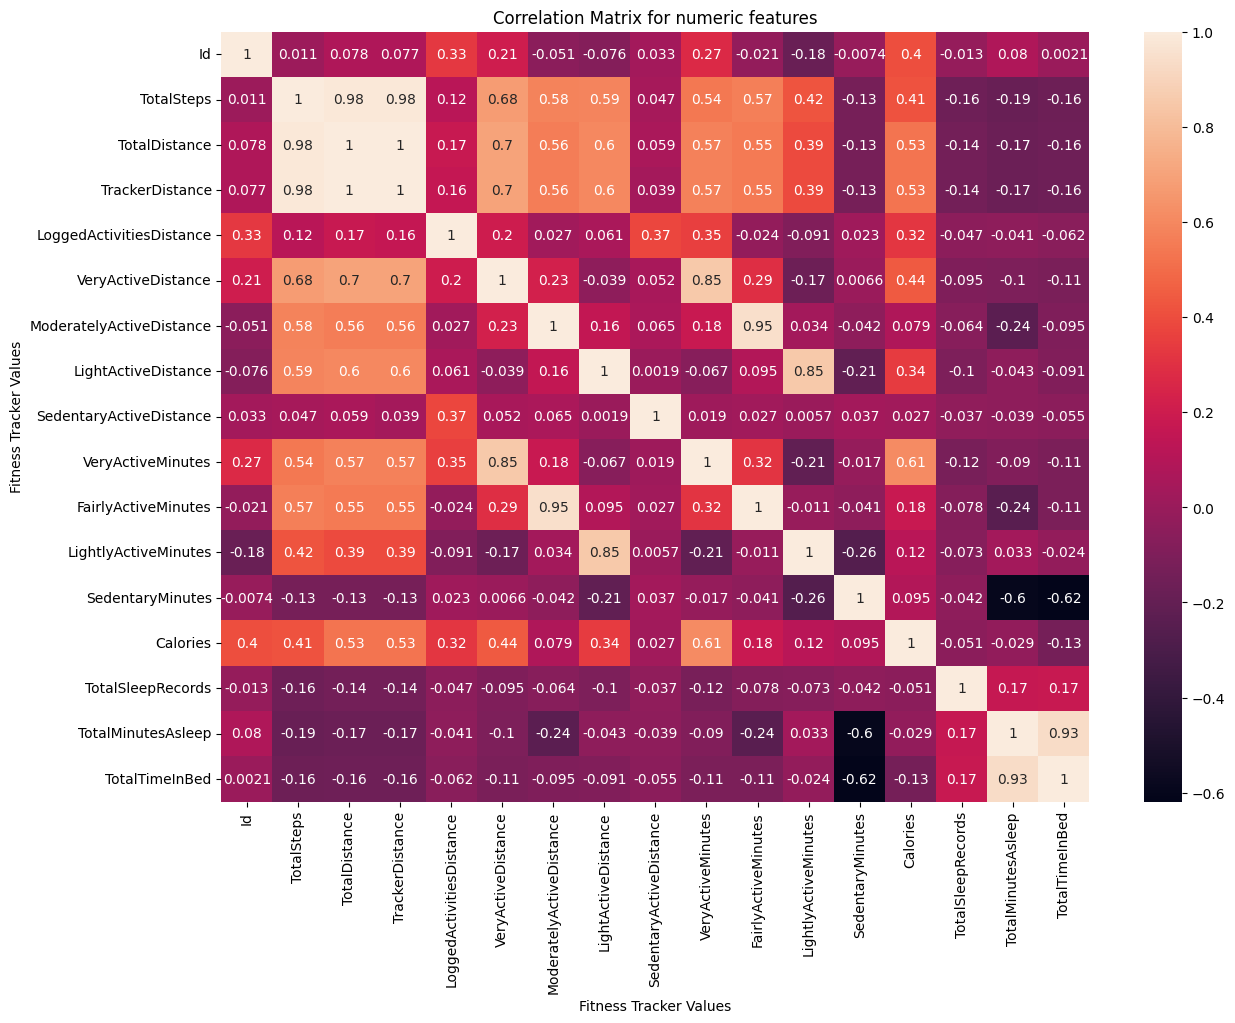

In [10]:
# Let's see the corelation between Total Distance and Total minutes as Sleep
correlation_matrix = df_merge.corr(method = 'pearson', numeric_only = True)
plt.figure(figsize=(14,10))

sns.heatmap(correlation_matrix,annot = True)

plt.title('Correlation Matrix for numeric features')

plt.xlabel('Fitness Tracker Values')
plt.ylabel('Fitness Tracker Values')

plt.show()



#### Finding 2 - We can see that "Very Active Distance" has more positive correlation to Calories burnt then compare to "Moderate Active Distance" and "Light Active Distance"

In [30]:
#Let's see the average distance travelled each day.

avg_steps_df = df.groupby('Id')['TotalSteps'].mean().reset_index()
avg_steps_df

,Id,TotalSteps
0,1503960366,12116.741935
1,1624580081,5743.903226
2,1644430081,7282.966667
3,1844505072,2580.064516
4,1927972279,916.129032
5,2022484408,11370.645161
6,2026352035,5566.870968
7,2320127002,4716.870968
8,2347167796,9519.666667
9,2873212765,7555.774194


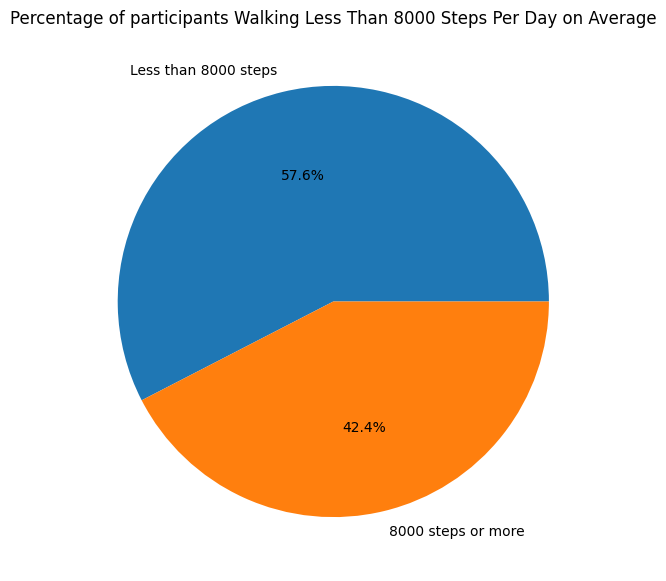

In [32]:
#Let's visualize this data and see how many participants have an average step counts of less than 8000 which is recommeneded step count by CDC.

# Count number of IDs that have less than 8000 steps on average
less_than_8000 = sum(avg_steps_df['TotalSteps'] < 8000)

# Count number of IDs that have 8000 or more steps on average
more_than_8000 = sum(avg_steps_df['TotalSteps'] >= 8000)

# Create a pie chart
plt.figure(figsize=(10,7))
plt.pie([less_than_8000, more_than_8000], labels=['Less than 8000 steps', '8000 steps or more'], autopct='%1.1f%%')

plt.title('Percentage of participants Walking Less Than 8000 Steps Per Day on Average')
plt.show()



#### Finding 3: We can see that there over 57 % of participants are walking less than 8000 steps a day.

## Act

|     | Analysis Results                                                                                         | Recommendation                                                                                                         |
|:----|:---------------------------------------------------------------------------------------------------------|:-----------------------------------------------------------------------------------------------------------------------|
|  1  | There's a correlation between Longer the duration of sleep, shorter walking distance                     | The device app should notify the users about the sleep duration with a recommended total steps for that day to over turn this correlation results. |
|  2  | We can see that "Very Active Distance" has more positive correlation to Calories burnt then compare to "Moderate Active Distance" and "Light Active Distance" | The device app should recommend users when moderate active distance is logged and motivate the users for a longer active distance for higher calories burn. |
|  3  | We can see that there over 57 % of participants are walking less than 8000 steps a day.                    | A notification to motivate users to walk atleast 8000 steps a day for a healthy life style.                            |
